In [1]:
import tensorflow as tf
import numpy as np

from rcnn.simple_nn import build_rpn, build_shared
from rcnn.video_parser import get_data
from rcnn.data_generators import get_anchor, video_streamer

import pickle

from matplotlib import pyplot as plt
import os

Using TensorFlow backend.


In [2]:
os.environ['CUDA_VIDIBLE_DEVICES'] = '1'

In [3]:
from random import seed
seed(1234)
np.random.seed(1234)

In [4]:
data,_,_ = get_data('./videos/', './annotations/')

Parsing annotation files


In [5]:
with open('config.pickle', 'rb') as f:
    C = pickle.load(f)

In [6]:
data_gen = video_streamer(data, 2, C, lambda x,y: [x,y], 'tf', 'test')

In [7]:
x = next(data_gen)

In [8]:
x[1][0].shape

(1, 20, 32, 32, 18)

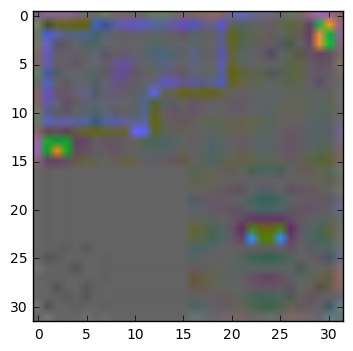

In [9]:
plt.imshow(x[0][0,16])
plt.show()

In [10]:
num_anchors = len(C.anchor_box_ratios) * len(C.anchor_box_scales)

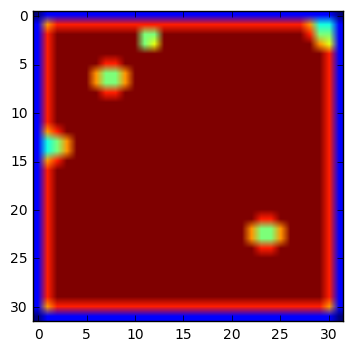

In [11]:
plt.imshow((x[1][0][0,16][...,:num_anchors]).sum(axis=-1))
plt.show()

In [12]:
x[1][1].shape

(1, 20, 32, 32, 72)

In [13]:
sess = tf.Session()

In [14]:
video_input = tf.placeholder(tf.float32, [1, None, None, None, 3])

In [15]:
base = build_shared(video_input)
rpn = build_rpn(base, num_anchors)

In [16]:
saver = tf.train.Saver()

In [17]:
rpn[0] = tf.nn.sigmoid(rpn[0])
def predict_rpn(X):
    return sess.run(rpn, {video_input:X})

In [96]:
saver.restore(sess, './save_dir/rpn_only.sv')

INFO:tensorflow:Restoring parameters from ./save_dir/rpn_only.sv


In [97]:
preds = predict_rpn(x[0])[0]

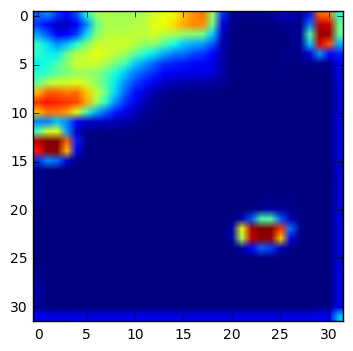

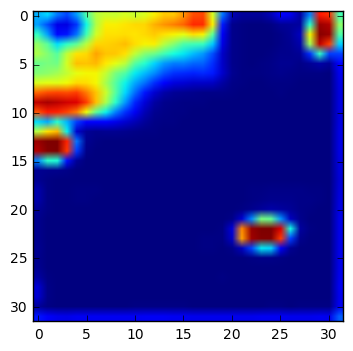

In [98]:
plt.imshow(preds[0,16].mean(axis=-1))#, vmin=0, vmax=1)
plt.show()

plt.imshow(preds[0,16].max(axis=-1))#, vmin=0, vmax=1)
plt.show()

In [92]:
preds[0,19][4:-4,4:-4].max(), preds[0,19].min(), preds[0,19].mean()

(0.98771065, 2.3098137e-05, 0.033698902)

In [30]:
x[1][0][...,num_anchors:].mean()

0.00021701389

In [17]:
preds.shape

(4, 8, 32, 32, 9)

In [286]:
class_mapping = C.class_mapping

In [280]:
P_rpn = predict_rpn(x[0])

In [281]:
P_rpn = list(map(lambda x: x[0,0][np.newaxis,...], P_rpn))
img_data = x[-1][0][0]

In [282]:
img_data

{'bboxes': [{'class': 'bbox', 'x1': 22, 'x2': 24, 'y1': 0, 'y2': 2},
  {'class': 'bbox', 'x1': 6, 'x2': 8, 'y1': 29, 'y2': 31}],
 'filepath': './videos/8/37.jpg',
 'height': 32,
 'width': 32}

In [283]:
from rcnn import roi_helpers

In [287]:
R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, 'tf', use_regr=True, overlap_thresh=0.7, max_boxes=300)
X2, Y1, Y2, IouS = roi_helpers.calc_iou(R, img_data, C, class_mapping)

In [272]:
P_rpn[0].shape

(0, 32, 32, 9)

In [289]:
X2.shape

(1, 28, 4)

In [290]:
Y1.shape

(1, 28, 2)

In [291]:
Y2.shape

(1, 28, 8)

In [300]:
Y2

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.    